<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
# Modified Gompertz-Model


In [ ]:

#Read excel data relating to b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/RC-CGS-M.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Biogas yield of slaughterhouse waste (RC-CGS-M) in ml/g oTS")
print (data)
print (data.columns)

Mounted at /content/drive
Biogas yield of slaughterhouse waste (RC-CGS-M) in ml/g oTS
     HRT(D)  Biogas Yield of RC-CGS-M (ml/g oTS)
0      0.00                                 0.00
1      0.63                                 7.28
2      0.75                                14.35
3      0.88                                19.86
4      1.00                                25.48
..      ...                                  ...
104   65.96                               291.48
105   66.71                               290.96
106   67.88                               291.48
107   69.00                               291.37
108   69.83                               291.58

[109 rows x 2 columns]
Index(['HRT(D)', 'Biogas Yield of RC-CGS-M (ml/g oTS)'], dtype='object')


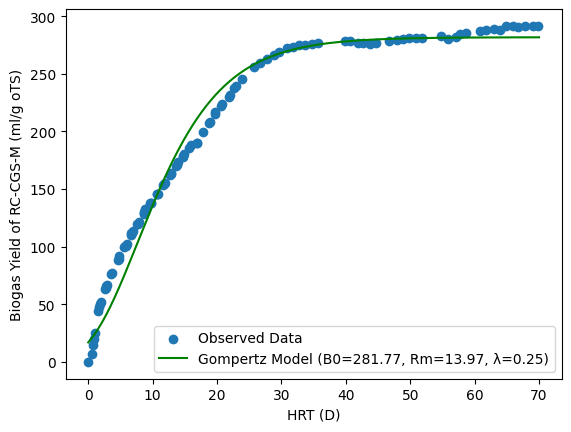

B(t) = 281.77 * exp(-exp((13.97 * e / 281.77) * (0.25 - t) + 1))
R-squared: 0.9760723139739109
RMSE: 13.207738887455136


In [ ]:
# Importing useful libraries
from scipy.optimize import curve_fit
# Function
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
# Data Description
# HRT as Independent Variable
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
t_data = data['HRT(D)'].values
B_data = data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values
# Applying the fit
popt, pcov = curve_fit(gompertz_model, t_data, B_data, bounds=(0.25, [600, 70, 70]))
B0, Rm, lambda_ = popt
# Generate predictions
t_pred = np.linspace(0, 70, 600)
B_pred = gompertz_model(t_pred, B0, Rm, lambda_)
# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Gompertz Model (B0={B0:.2f}, Rm={Rm:.2f}, λ={lambda_:.2f})', color='green')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)')
plt.legend()
plt.show()
def model_equation():
    return f'B(t) = {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))'
print(model_equation())
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, gompertz_model(t_data, *popt))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, gompertz_model(t_data, *popt)))
print(f"RMSE: {rmse}")


In [ ]:
# First-Order Kinetic Model

<ipython-input-7-670f48e89bcc>:7: RuntimeWarning: overflow encountered in exp
  return B0 * (1 - np.exp(-k * t))


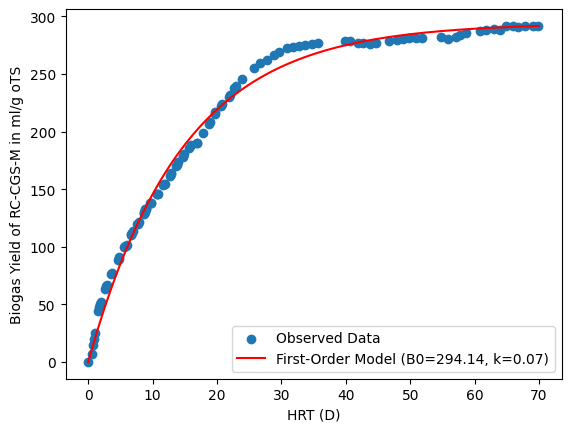

B(t) = 294.14 * (1 - exp(-0.07 * t))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# First-order kinetic model function
def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))
# Calling data
t_data = data['HRT(D)'].values
B_data = data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values

# Curve fitting to find B0 and k
popt, pcov = curve_fit(first_order_model, t_data, B_data)
B0, k = popt

# Generate predictions
t_pred = np.linspace(0, 70, 300)
B_pred = first_order_model(t_pred, B0, k)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'First-Order Model (B0={B0:.2f}, k={k:.2f})', color='red')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M in ml/g oTS')
plt.legend()
plt.show()
model_equation = f'B(t) = {B0:.2f} * (1 - exp(-{k:.2f} * t))'
model_equation = f'B(t) = {B0:.2f} * (1 - exp(-{k:.2f} * t))'
print(model_equation)

In [ ]:
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, first_order_model(t_data, *popt))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, first_order_model(t_data, *popt)))
print(f"RMSE: {rmse}")

R-squared: 0.992462187221197
RMSE: 7.413116017590504


In [ ]:
# Hybdrid model (Modified Gompertz Model and First-Order Kinetic Model)

B(t) = 286.00 * exp(-exp((14.46 * e / 286.00) * (8.97 - t) + 1))


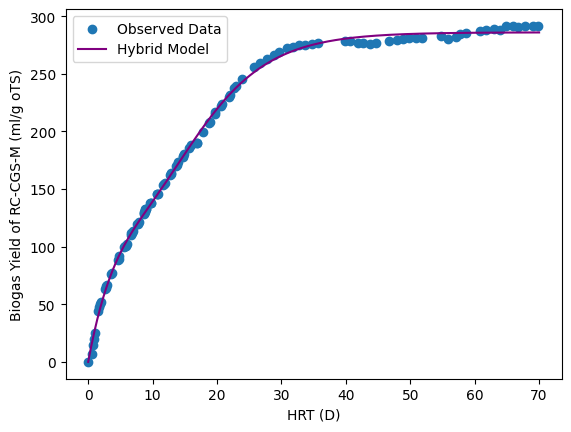

In [ ]:
# Hybrid model function (blending First-Order and Gompertz)
def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = B0 * (1 - np.exp(-k * t))
    gompertz = B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models
def hybrid_model_equation():
    return f'B(t) = 0.5 * ({B0:.2f} * (1 - exp(-{k:.2f} * t)) + {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))))'
# Calling data
t_data = data['HRT(D)'].values
B_data = data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values

# Curve fitting for hybrid model
popt, pcov = curve_fit(hybrid_model, t_data, B_data, bounds=([0, 0, 0, 0], [450, 100, 40, 40]))
B0, k, Rm, lambda_ = popt

# Generate predictions
t_pred = np.linspace(0,70, 300)
B_pred = hybrid_model(t_pred, B0, k, Rm, lambda_)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Hybrid Model', color='purple')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)')
def model_equation():
    return f'B(t) = {B0:.2f} * exp(-exp(({Rm:.2f} * e / {B0:.2f}) * ({lambda_:.2f} - t) + 1))'
print(model_equation())
plt.legend()
plt.show()
print ()


In [ ]:
# New hybrid model codes

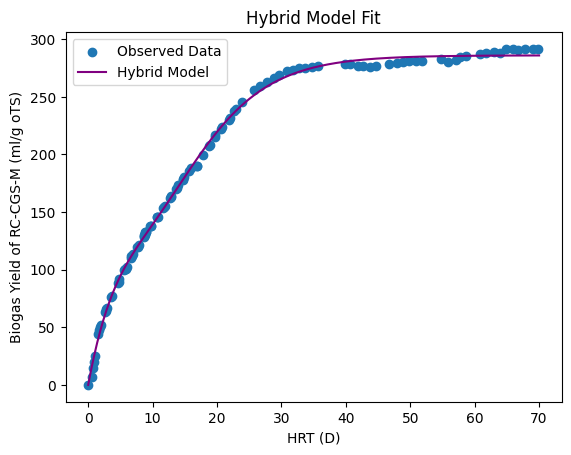

Hybrid Model Equation:
B(t) = 0.5 * (286.00 * (1 - exp(-0.21 * t)) + 286.00 * exp(-exp((14.46 * 2.7183 / 286.00) * (8.97 - t) + 1)))
R-squared: 0.9986
RMSE: 3.2274


In [ ]:
# %%
# Hybrid model (Modified Gompertz Model and First-Order Kinetic Model)

# Hybrid model function (blending First-Order and Gompertz)
def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = B0 * (1 - np.exp(-k * t))
    gompertz = B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2  # Averaging both models

# Curve fitting for hybrid model
# Provide initial guesses (p0) and correct bounds format
# Adjust p0 values based on your data visualization and knowledge
initial_guess_hybrid = [300, 0.1, 10, 1] # Example initial guesses (adjust based on data)
bounds_hybrid = ([0, 0, 0, 0], [450, 100, 40, 40]) # Correct bounds format (adjust upper bounds if needed)
popt_hybrid, pcov_hybrid = curve_fit(hybrid_model, t_data, B_data, p0=initial_guess_hybrid, bounds=bounds_hybrid)
B0_hybrid, k_hybrid, Rm_hybrid, lambda_hybrid = popt_hybrid

# Generate predictions
t_pred = np.linspace(0,70, 300)
B_pred_hybrid = hybrid_model(t_pred, B0_hybrid, k_hybrid, Rm_hybrid, lambda_hybrid)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred_hybrid, label=f'Hybrid Model', color='purple')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)')
plt.legend()
plt.title('Hybrid Model Fit')
plt.show()

# Model Equation
# Correct the string formatting for the hybrid model equation
hybrid_model_equation = f'B(t) = 0.5 * ({B0_hybrid:.2f} * (1 - exp(-{k_hybrid:.2f} * t)) + {B0_hybrid:.2f} * exp(-exp(({Rm_hybrid:.2f} * {np.e:.4f} / {B0_hybrid:.2f}) * ({lambda_hybrid:.2f} - t) + 1)))'
print("Hybrid Model Equation:")
print(hybrid_model_equation)

# Statistical Evaluaton of the model
r_squared_hybrid = r2_score(B_data, hybrid_model(t_data, *popt_hybrid))
rmse_hybrid = np.sqrt(mean_squared_error(B_data, hybrid_model(t_data, *popt_hybrid)))
print(f"R-squared: {r_squared_hybrid:.4f}")
print(f"RMSE: {rmse_hybrid:.4f}")

In [ ]:
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, hybrid_model(t_data, B0, k, Rm, lambda_))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data, hybrid_model(t_data, B0, k, Rm, lambda_)))
print(f"RMSE: {rmse}")

R-squared: 0.9985712577837899
RMSE: 3.227416853139972


In [ ]:
# Logistic Growth Model

B(t) = 280.39 / (1 + np.exp((4 * 12.88 / 280.39) * (0.00 - t) + 2))


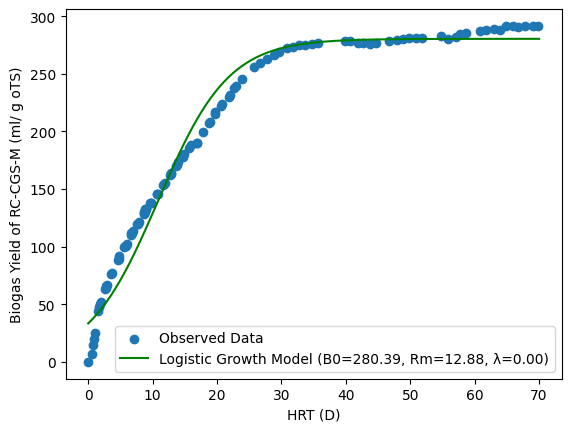

In [ ]:
# Logistic growth model function
def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))
def logistic_growth_model_equation():
    return f'B(t) = {B0:.2f} / (1 + np.exp((4 * {Rm:.2f} / {B0:.2f}) * ({lambda_:.2f} - t) + 2))'

# Calling data
t_data = data['HRT(D)'].values
B_data = data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values

# Curve fitting to find B0, Rm, and lambda_
popt, pcov = curve_fit(logistic_growth_model, t_data, B_data, bounds=(0, [300, 70, 7]))
B0, Rm, lambda_ = popt

# Generate predictions
t_pred = np.linspace(0, 70, 300)
B_pred = logistic_growth_model(t_pred, B0, Rm, lambda_)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Logistic Growth Model (B0={B0:.2f}, Rm={Rm:.2f}, λ={lambda_:.2f})', color='green')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/ g oTS)')
print (logistic_growth_model_equation())
plt.legend()
plt.show()


In [ ]:
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, logistic_growth_model(t_data, B0, Rm, lambda_))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data,  logistic_growth_model(t_data, B0, Rm, lambda_)))
print(f"RMSE: {rmse}")

R-squared: 0.9743721261366661
RMSE: 13.66892664047618


In [ ]:
# Two-phase exponential model of RC-CGS-M

B(t) = -5637.05 * (1 - exp(-0.08 * t)) + 5930.37 * (1 - exp(-0.08 * t))


<ipython-input-18-0709f13124e3>:3: RuntimeWarning: overflow encountered in exp
  return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))


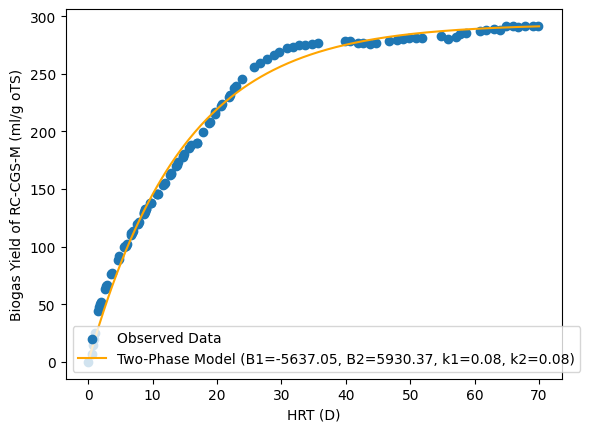

In [ ]:
# Two-phase exponential model function
def two_phase_model(t, B1, B2, k1, k2):
    return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))
def two_phase_model_equation():
    return f'B(t) = {B1:.2f} * (1 - exp(-{k1:.2f} * t)) + {B2:.2f} * (1 - exp(-{k2:.2f} * t))'

# Calling data
t_data = data['HRT(D)'].values
B_data = data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values

# Curve fitting to find B1, B2, k1, and k2
popt, pcov = curve_fit(two_phase_model, t_data, B_data, maxfev=10000)
B1, B2, k1, k2 = popt

# Generate predictions
t_pred = np.linspace(0.25, 70, 300)
B_pred = two_phase_model(t_pred, B1, B2, k1, k2)

# Plot results
plt.scatter(t_data, B_data, label='Observed Data')
plt.plot(t_pred, B_pred, label=f'Two-Phase Model (B1={B1:.2f}, B2={B2:.2f}, k1={k1:.2f}, k2={k2:.2f})', color='orange')
plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)')
print (two_phase_model_equation())
plt.legend()
plt.show()


In [ ]:
# Statistical Evaluaton of the model
# R-squared
from sklearn.metrics import r2_score
r_squared = r2_score(B_data, two_phase_model(t_data, B1, B2, k1, k2))
print(f"R-squared: {r_squared}")
# Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(B_data,  two_phase_model(t_data, B1, B2, k1, k2)))
print(f"RMSE: {rmse}")

R-squared: 0.9924834887966276
RMSE: 7.402634013377217


In [ ]:
# Composite Graph

<ipython-input-26-ddd83182ea48>:6: RuntimeWarning: overflow encountered in exp
  return B0 * (1 - np.exp(-k * t))


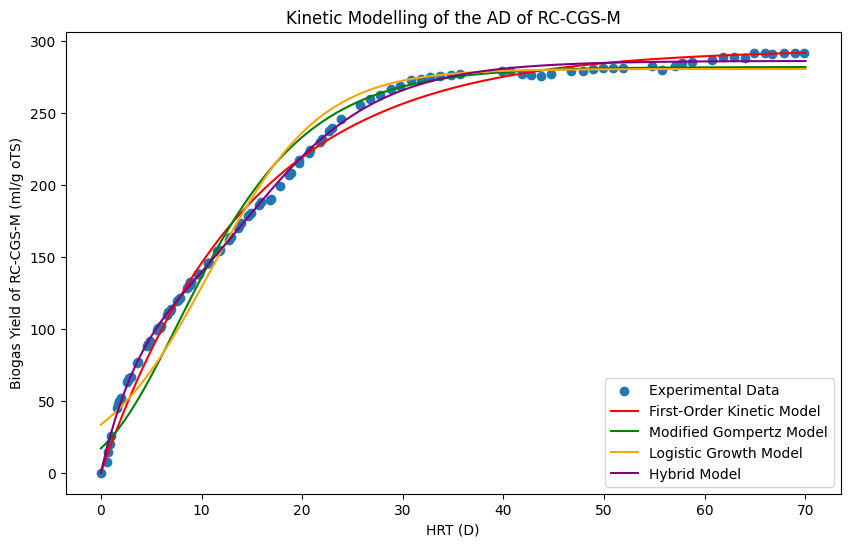

In [ ]:
# Define all model functions
def gompertz_model(t, B0, Rm, lambda_):
    return B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))

def first_order_model(t, B0, k):
    return B0 * (1 - np.exp(-k * t))

def hybrid_model(t, B0, k, Rm, lambda_):
    first_order = B0 * (1 - np.exp(-k * t))
    gompertz = B0 * np.exp(-np.exp((Rm * np.e / B0) * (lambda_ - t) + 1))
    return (first_order + gompertz) / 2

def logistic_growth_model(t, B0, Rm, lambda_):
    return B0 / (1 + np.exp((4 * Rm / B0) * (lambda_ - t) + 2))

def two_phase_model(t, B1, B2, k1, k2):
    return B1 * (1 - np.exp(-k1 * t)) + B2 * (1 - np.exp(-k2 * t))

# Assuming t_data and B_data are already loaded from your data
# from google.colab import drive
# drive.mount('/content/drive')
# file_path = '/content/drive/MyDrive/SummaryofBY/RC-CGS-M.csv'
# data = pd.read_csv(file_path)
# t_data = data['HRT(D)'].values
# B_data = data['Biogas Yield of RC-CGS-M (ml/g oTS)'].values

# Curve fitting for each model
popt_gompertz, pcov_gompertz = curve_fit(gompertz_model, t_data, B_data, bounds=(0.25, [600, 70, 70]))
B0_g, Rm_g, lambda_g = popt_gompertz

popt_first_order, pcov_first_order = curve_fit(first_order_model, t_data, B_data)
B0_fo, k_fo = popt_first_order

# Provide initial guesses and bounds for the hybrid model
initial_guess_hybrid = [300, 0.1, 10, 1]
bounds_hybrid = ([0, 0, 0, 0], [450, 100, 40, 40])
popt_hybrid, pcov_hybrid = curve_fit(hybrid_model, t_data, B_data, p0=initial_guess_hybrid, bounds=bounds_hybrid)
B0_h, k_h, Rm_h, lambda_h = popt_hybrid

popt_logistic, pcov_logistic = curve_fit(logistic_growth_model, t_data, B_data, bounds=(0, [300, 70, 7]))
B0_l, Rm_l, lambda_l = popt_logistic


# Generate predictions for plotting
t_pred = np.linspace(0, 70, 300)

B_pred_gompertz = gompertz_model(t_pred, B0_g, Rm_g, lambda_g)
B_pred_first_order = first_order_model(t_pred, B0_fo, k_fo)
B_pred_hybrid = hybrid_model(t_pred, B0_h, k_h, Rm_h, lambda_h)
B_pred_logistic = logistic_growth_model(t_pred, B0_l, Rm_l, lambda_l)

# Plotting all models
plt.figure(figsize=(10, 6))
plt.scatter(t_data, B_data, label='Experimental Data')
plt.plot(t_pred, B_pred_first_order, label='First-Order Kinetic Model', color='red')
plt.plot(t_pred, B_pred_gompertz, label='Modified Gompertz Model', color='green')
plt.plot(t_pred, B_pred_logistic, label='Logistic Growth Model', color='orange')
plt.plot(t_pred, B_pred_hybrid, label='Hybrid Model', color='purple')

plt.xlabel('HRT (D)')
plt.ylabel('Biogas Yield of RC-CGS-M (ml/g oTS)')
plt.title('Kinetic Modelling of the AD of RC-CGS-M')
plt.legend()
plt.show()